In [1]:
#Installation des pacakges
#!pip install scikit-learn
#!pip install matplotlib
#!pip install seaborn
!pip install pandas
!pip install numpy

In [2]:
import seaborn as sns
import numpy as np #  manip des arrays (tableaux)
import pandas as pd #  manip des dataframes
import matplotlib.pyplot as plt #  construct des graphes : barplot, cammenberts
from sklearn.cluster import KMeans

In [3]:
#loading du data avec pandas
data = pd.read_csv('../data/Summer-Olympic-medals-1976-to-2008.csv', index_col='Event_gender')
data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Medal
Event_gender,,,,,,,,,,
W,Montreal,1976.0,Aquatics,Diving,3m springboard,"K�HLER, Christa",Women,GDR,East Germany,Silver
M,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,Bronze
M,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,Gold
M,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,Silver
W,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,Bronze
...,...,...,...,...,...,...,...,...,...,...
M,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,Bronze
M,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,Gold
M,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,Silver


In [4]:
#Verification des lignes vides
data.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Medal           117
dtype: int64

In [5]:
#Suppression des na
data.dropna(inplace=True)

In [6]:
#Réverification des lignes vides
data.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Medal           0
dtype: int64

In [7]:
data.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [8]:
data.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Medal            object
dtype: object

In [9]:
data.describe(include=['O'])

,City,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Medal
count,15316,15316,15316,15316,15316,15316,15316,15316,15316
unique,9,28,41,293,11337,2,128,127,3
top,Beijing,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,Bronze
freq,2042,2210,1523,817,16,9388,1992,1992,5258


In [10]:
#Conversion de Year en int
data['Year'] = data['Year'].astype(int)
data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Medal
Event_gender,,,,,,,,,,
W,Montreal,1976,Aquatics,Diving,3m springboard,"K�HLER, Christa",Women,GDR,East Germany,Silver
M,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,Bronze
M,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,Gold
M,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,Silver
W,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,Bronze
...,...,...,...,...,...,...,...,...,...,...
M,Beijing,2008,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,Bronze
M,Beijing,2008,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,Gold
M,Beijing,2008,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,Silver


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['Medal']);
data['Medal'] = le.transform(data['Medal'])

le.fit(data['Gender']);
data['Gender'] = le.transform(data['Gender'])

le.fit(data['Sport']);
data['Sport'] = le.transform(data['Sport'])

le.fit(data['Country']);
data['Country'] = le.transform(data['Country'])
data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Medal
Event_gender,,,,,,,,,,
W,Montreal,1976,0,Diving,3m springboard,"K�HLER, Christa",1,GDR,29,2
M,Montreal,1976,0,Diving,3m springboard,"KOSENKOV, Aleksandr",0,URS,95,0
M,Montreal,1976,0,Diving,3m springboard,"BOGGS, Philip George",0,USA,117,1
M,Montreal,1976,0,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",0,ITA,51,2
W,Montreal,1976,0,Diving,10m platform,"WILSON, Deborah Keplar",1,USA,117,0
...,...,...,...,...,...,...,...,...,...,...
M,Beijing,2008,27,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",0,FRA,36,0
M,Beijing,2008,27,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",0,GEO,37,1
M,Beijing,2008,27,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",0,AZE,6,2


In [12]:
data.describe()
data = data.drop_duplicates()

<AxesSubplot:>

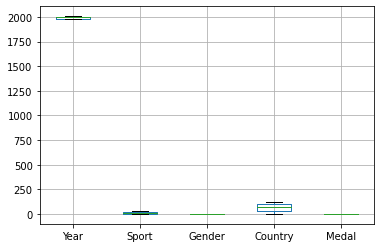

In [13]:
data.boxplot()

In [14]:
corr = data.corr()
corr

,Year,Sport,Gender,Country,Medal
Year,1.000000,-0.030643,0.119216,-0.140096,-0.000185
Sport,-0.030643,1.000000,-0.045464,-0.078665,-0.007562
Gender,0.119216,-0.045464,1.000000,-0.042510,0.009441
Country,-0.140096,-0.078665,-0.042510,1.000000,0.031176
Medal,-0.000185,-0.007562,0.009441,0.031176,1.000000


<AxesSubplot:>

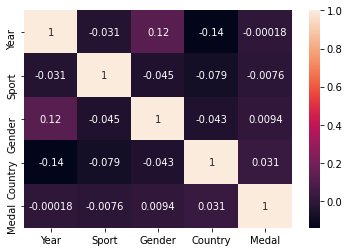

In [15]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

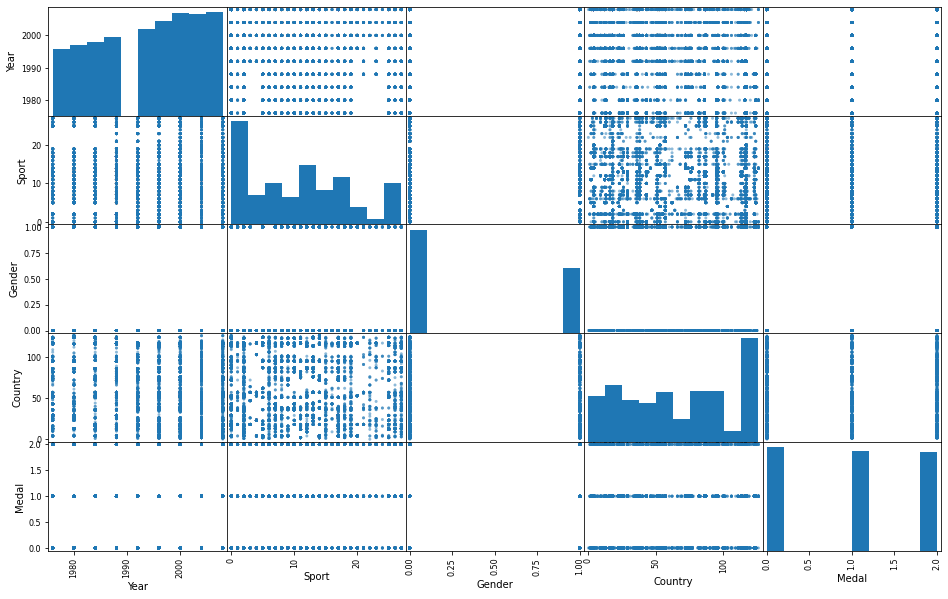

In [16]:
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(data, figsize = (16,10))

In [17]:
data = data.filter(['Sport','Medal','Gender','Year'], axis=1)

<AxesSubplot:>

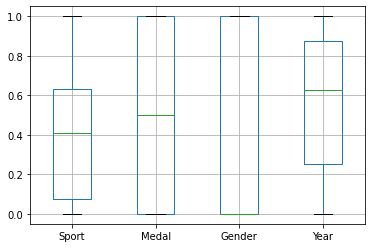

In [18]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = min_max.fit_transform(data)
df_minmax = pd.DataFrame(df_minmax, columns=data.columns, index=data.index)
df_minmax.boxplot()

In [19]:
df_minmax

,Sport,Medal,Gender,Year
Event_gender,,,,
W,0.0,1.0,1.0,0.0
M,0.0,0.0,0.0,0.0
M,0.0,0.5,0.0,0.0
M,0.0,1.0,0.0,0.0
W,0.0,0.0,1.0,0.0
...,...,...,...,...
M,1.0,0.0,0.0,1.0
M,1.0,0.5,0.0,1.0
M,1.0,1.0,0.0,1.0


In [20]:
pd.DataFrame(df_minmax,columns=data.columns)
df_minmax.shape

(15315, 4)

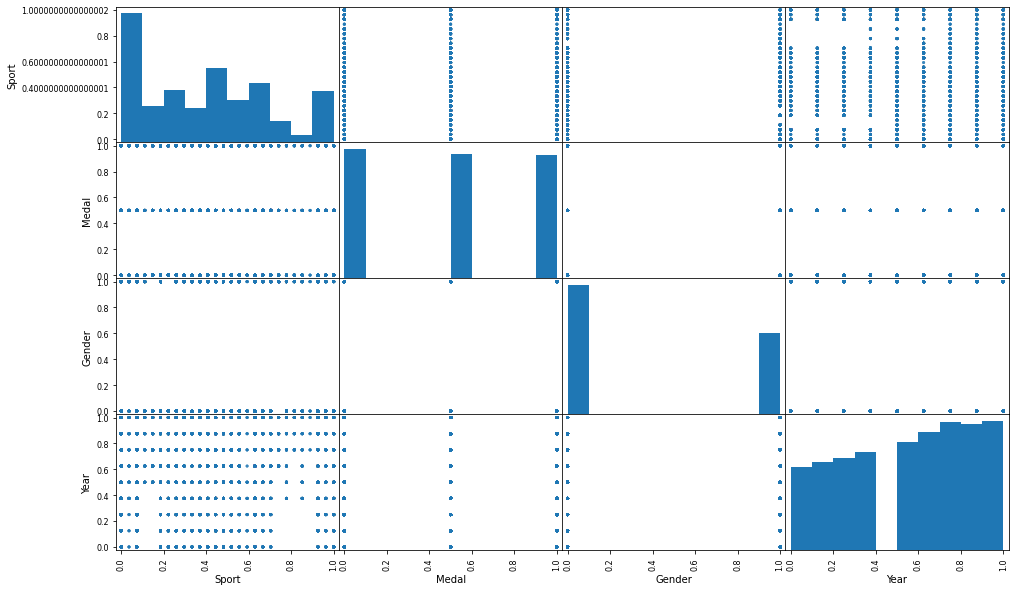

In [21]:
scatter_mat = scatter_matrix(df_minmax, figsize = (16,10))